<a href="https://colab.research.google.com/github/pragnavi/Machine-Learning/blob/master/MPG_Piecewise_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [65]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

**Importing Data**

In [66]:
names = ['mpg', 'cylinders','displacement', 'horsepower', 
         'weight', 'acceleration', 'model year', 'origin', 'car name']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',
                 header=None,delim_whitespace=True,names=names,na_values='?')
df = df.dropna()
df = df.sort_values(by=['horsepower'])

**Transforming Input Data**

Transform the input data to form a data matrix X with multiple columns

In [67]:
X = df['horsepower'].values
y = df['mpg'].values
l = 100

nsamp = X.shape[0]
X = X.reshape([nsamp,1])

zeros = np.zeros((nsamp,1))
ones = np.ones((nsamp,1))
X_orig = X
X_mod = np.hstack((ones,X_orig))
X = np.hstack((X_mod,zeros))
for row in X:
  if(row[1]>=l):
    row[2]=row[1]-l
    row[1]=l
X.shape

(392, 3)

**Calculating Optimal β**

In [68]:
Xt = np.transpose(X)
beta= np.linalg.inv(Xt@X)@Xt@y
print("Optimal Beta:", beta)

Optimal Beta: [53.57724087 -0.32638817 -0.09142217]


**Extracting Parameters**

Extracting from the optimal 𝛽, optimal values for 𝑎1, 𝑠1, 𝑠2

In [69]:
a1 = beta[0]
s1 = beta[1]
s2 = beta[2]
print("Optimal a1:", a1)
print("Optimal s1:", s1)
print("Optimal s2:", s2)

Optimal a1: 53.57724087172677
Optimal s1: -0.3263881725395733
Optimal s2: -0.09142217282311646


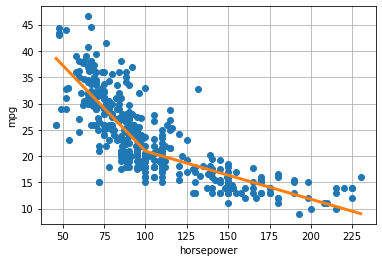

In [77]:
x = df['horsepower'].values
ypred = X@beta

plt.plot(x, y,'o')                    # Plot the data points
plt.plot(x, ypred,'-',linewidth=3)  # Plot the regression line (the predicted values)
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.grid(True)